In [13]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import numpy as np
import os

In [14]:
dtime = datetime(2019, 4, 30, 00)
dtimestamp = datetime.timestamp(dtime)
ms = int(round(dtimestamp * 1000))
n_it = 100
granularity = 10 #seconds

In [15]:
def get_data(length, num_series)
    return random.uniform(low=0.0, high=1.0, size=(length,num_series))
    

SyntaxError: invalid syntax (1687801874.py, line 1)

In [16]:
def generate_scarsity(length, num_series, scarsity_percentage):
    # Ensure the scarsity percentage is between 0 and 100
    scarsity_percentage = max(0, min(100, scarsity_percentage))
    
    time_series_data = []
    for _ in range(num_series):
        time_series = []        
        for _ in range(length):
            current_value = random.uniform(0, 1)
            if random.randint(1, 100) <= scarsity_percentage:
                current_value = None
            time_series.append(current_value)
        time_series_data.append(time_series)
    return time_series_data
    
def generate_delta(length, num_series, delta_percentage):
    time_series_data = []
    for _ in range(num_series):
        delta_percentage = max(0, min(100, delta_percentage))
        time_series = []
        previous_value = random.uniform(0, 1)  # Initialize the first value randomly
        for _ in range(length):
            delta = random.uniform(-1 * delta_percentage, delta_percentage )  
            current_value = previous_value + delta
            time_series.append(current_value)
            previous_value = current_value
        time_series_data.append(time_series)
    return time_series_data
    


def generate_repeats(length, num_series, repeats_percentage):
    time_series_data = []
    for _ in range(num_series):
    # Ensure the repeats percentage is between 0 and 100
        repeats_percentage = max(0, min(100, repeats_percentage))
        time_series = []
        previous_value = random.uniform(0, 1)  # Initialize the first value randomly
        for _ in range(length):
            possible_current_value = random.uniform(0, 1)
            if random.randint(0, 100) < repeats_percentage:
                current_value = previous_value 
            else:
                # Generate a new random value
                current_value = possible_current_value

            # Ensure the generated value stays within the [0, 1] range
            current_value = max(0, min(1, current_value))

            time_series.append(current_value)
            previous_value = current_value
        time_series_data.append(time_series)
    return time_series_data

def generate_outliers(length, num_series, outlier_percentage,std=5):
    time_series_data = []
    for _ in range(num_series):
        # Ensure the repeats percentage is between 0 and 100
        outlier_percentage = max(0, min(100, outlier_percentage))
        time_series = []
        for _ in range(length):
            outlier_value = np.random.normal(0, std) 
            current_value = random.uniform(0, 1)
            if random.randint(0, 100) < outlier_percentage:
                # Generate a new random outlier
                current_value =  outlier_value
                
            time_series.append(current_value)
            previous_value = current_value
        time_series_data.append(time_series)
    return time_series_data

def export(ts, file):
    try:
        os.mkdir("../datasets/compression/")
    except FileExistsError:
        pass
    df = pd.DataFrame(ts).T
    df['time'] = [datetime.fromtimestamp((ms + i * 1000 * granularity) // 1000).strftime("%Y-%m-%dT%H:%M:%S") for i in range(len(df))] #2019-03-01T00:00:00
    df['st'] = ["st0"]*len(df) #['st' + str(i // (len(df) // 10)) for i in range(len(df))] 
    df = df[ ['time'] + ['st'] + [ col for col in df.columns if col != 'time' and col != 'st' ] ]
    col_names = list(df.columns)
    df.columns = col_names[:2] + [ "s"+str(id) for id in col_names[2:]]
    df = df.rename(columns={'st': 'id_station'})
    df.to_csv("../datasets/compression/"+file, index=False)
    #print(df)
    return df

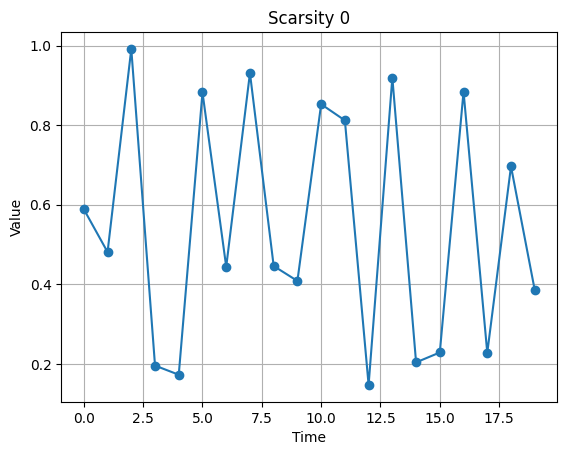

9980    0.946076
9981    0.460244
9982    0.789560
9983    0.197701
9984    0.013761
9985    0.525775
9986    0.794366
9987    0.885989
9988    0.938959
9989    0.336220
9990    0.954744
9991    0.279676
9992    0.932755
9993    0.443702
9994    0.546260
9995    0.649626
9996    0.700668
9997    0.324542
9998    0.541210
9999    0.587701
Name: s1, dtype: float64


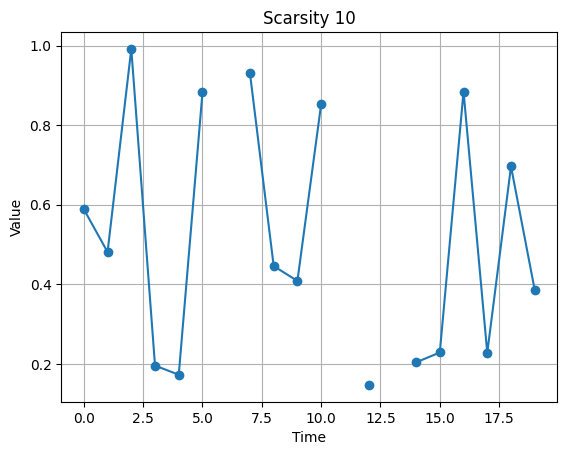

9980    0.946076
9981    0.460244
9982         NaN
9983    0.197701
9984    0.013761
9985         NaN
9986         NaN
9987    0.885989
9988    0.938959
9989    0.336220
9990    0.954744
9991    0.279676
9992         NaN
9993    0.443702
9994    0.546260
9995    0.649626
9996    0.700668
9997    0.324542
9998         NaN
9999    0.587701
Name: s1, dtype: float64


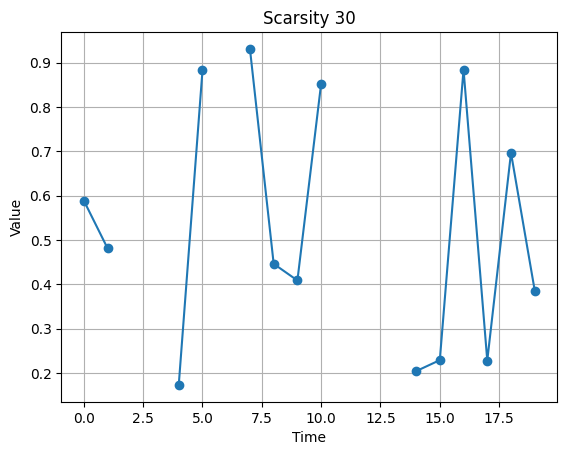

9980         NaN
9981    0.460244
9982         NaN
9983         NaN
9984    0.013761
9985         NaN
9986         NaN
9987    0.885989
9988    0.938959
9989         NaN
9990    0.954744
9991         NaN
9992         NaN
9993    0.443702
9994    0.546260
9995    0.649626
9996    0.700668
9997    0.324542
9998         NaN
9999    0.587701
Name: s1, dtype: float64


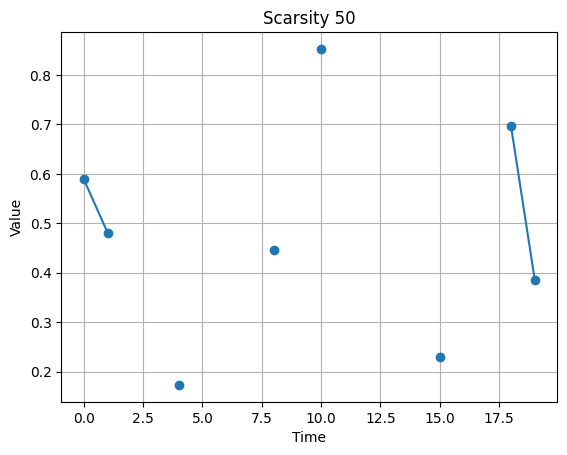

9980         NaN
9981    0.460244
9982         NaN
9983         NaN
9984    0.013761
9985         NaN
9986         NaN
9987         NaN
9988    0.938959
9989         NaN
9990    0.954744
9991         NaN
9992         NaN
9993    0.443702
9994    0.546260
9995    0.649626
9996    0.700668
9997    0.324542
9998         NaN
9999    0.587701
Name: s1, dtype: float64


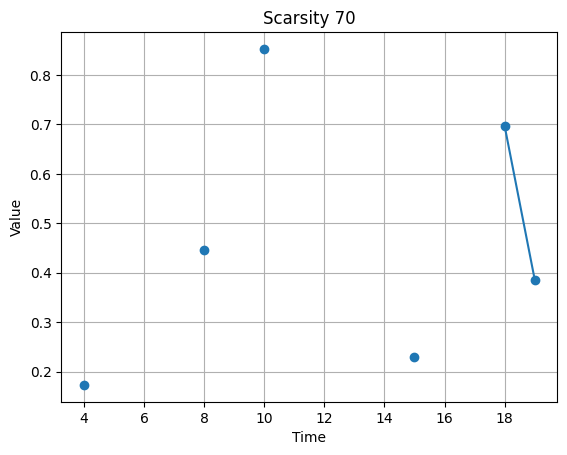

9980         NaN
9981         NaN
9982         NaN
9983         NaN
9984    0.013761
9985         NaN
9986         NaN
9987         NaN
9988         NaN
9989         NaN
9990    0.954744
9991         NaN
9992         NaN
9993    0.443702
9994         NaN
9995         NaN
9996         NaN
9997    0.324542
9998         NaN
9999    0.587701
Name: s1, dtype: float64


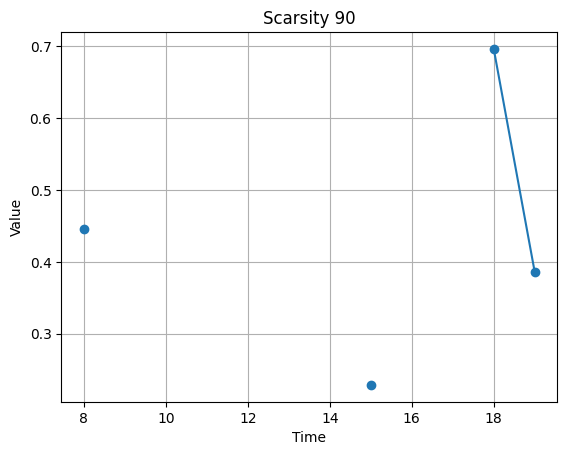

9980         NaN
9981         NaN
9982         NaN
9983         NaN
9984         NaN
9985         NaN
9986         NaN
9987         NaN
9988         NaN
9989         NaN
9990    0.954744
9991         NaN
9992         NaN
9993         NaN
9994         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
9999         NaN
Name: s1, dtype: float64


In [19]:
length=10000
num_series = 100
outlier_percentages = [0,1,2,5,10,20] #[1,2,5,10,20]
repeats_percentages =  [0,10,30,50,70,90]
scarsity_percentages = [0,10,30,50,70,90]
delta_percentages = [1,2,10] #[1,2,10]




#larger outliers
# for outlier_percentage in outlier_percentages:
#     random.seed(42)
#     np.random.seed(seed=0)
#     time_series_data = generate_outliers(length, num_series, outlier_percentage,std=15)
#     time_series_data = export(time_series_data, 'outliers_'+str(outlier_percentage)+'.csv')
#     # Plot the time series
#     time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
#     plt.title('Outliers ' + str(outlier_percentage) )
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.grid(True)
#     plt.show()
    
# for repeats_percentage in repeats_percentages:
#     random.seed(42)
#     time_series_data = generate_repeats(length, num_series, repeats_percentage)
#     time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
#     # Plot the time series
#     time_series_data.iloc[:200, 3].plot(marker='o', linestyle='-')
#     plt.title('Repeats ' + str(repeats_percentage) )
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.grid(True)
#     plt.show()


for scarsity_percentage in scarsity_percentages:
    random.seed(42)
    time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
    time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
    time_series_data.iloc[:20, 3].plot(marker='o', linestyle='-')
    plt.title('Scarsity ' + str(scarsity_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
    print(time_series_data.iloc[-20:, 3])
    
# for delta_percentage in delta_percentages:
#     random.seed(42)
#     time_series_data = generate_delta(length, num_series, delta_percentage)
#     time_series_data = export(time_series_data, 'delta_'+str(delta_percentage)+'.csv')
#     time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
#     plt.title('Delta ' + str(delta_percentage) )
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.grid(True)
#     plt.show()
    

In [6]:
os.listdir()

['compression_summary.ipynb',
 'complex_queries_remote.ipynb',
 'basic_queries_remote_d1_Layout.ipynb',
 'sq',
 'basic_queries_remote_d1_Partition.ipynb',
 'complex_queries_remote_runALL.ipynb',
 'demo_queries.ipynb',
 'compression_data_generation.ipynb',
 'complex_queries_remote_runALL_d1.ipynb',
 'TSM_Technical_Report.pdf',
 'run_demo.py',
 'udfs',
 'extra',
 'basic_queries_remote_d2_runAll_varyParams.ipynb',
 'basic_queries_remote_d2_runAll.ipynb',
 '.ipynb_checkpoints',
 'basic_queries_remote_d2.ipynb',
 'basic_queries_remote_d1_runAll.ipynb',
 'oq']